#   **SENTIMENTAL ANALYSIS - RESTAURANT REVIEWS**

***Libraries and tools ***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [ ]:
df=pd.read_csv("/content/a1_RestaurantReviews_HistoricDump.tsv",sep='\t')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(900, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


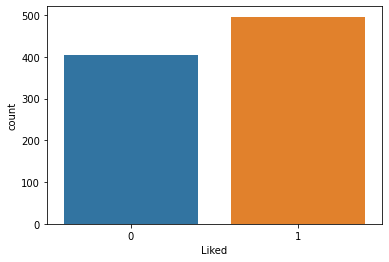

In [ ]:
sns.countplot(df.Liked)

**Pre-processing**

In [ ]:
import re
import string
def clean(x):
  x=x.lower()
  x = re.sub(r'\[.*?\}','  ',x)
  x=re.sub(r"can't",'can not',x)
  x=re.sub(r"don't",'do not',x)
  x=re.sub(r"didn't",'did not',x)
  x=re.sub(r'[\d-]{10,12}','mobno',x)
  x=re.sub(r'[^A-Za-z]','  ',x)
  x=re.sub(r'\s+','  ',x)
  x=re.sub(r'[''""...]','  ',x)
  x=re.sub(r'\n','  ',x)
  return x

In [ ]:
df['Review']=df.Review.apply(clean)

In [ ]:
df.head()


,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank hol...,1
4,the selection on the menu was great and...,1


**Split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.Liked.value_counts()

1    496
0    404
Name: Liked, dtype: int64

In [ ]:
Independent_variable=df.Review
Dependent_variable=df.Liked

IV_train,IV_test,DV_train,DV_test=train_test_split(Independent_variable,Dependent_variable,test_size=20,random_state=10)

In [ ]:
print('IV_Train : ', len(IV_train))
print('IV_Test : ', len(IV_test))
print('DV_Train : ', len(DV_train))
print('DV_Test : ', len(DV_test))

IV_Train :  880
IV_Test :  20
DV_Train :  880
DV_Test :  20


**Train model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
vec=TfidfVectorizer()
clf=LogisticRegression(solver = "lbfgs")

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline ([('Vectorizer',vec),('Classification',clf)])

In [ ]:
model.fit(IV_train,DV_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classification', LogisticRegression())])

**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
prediction=model.predict(IV_test)
confusion_matrix(prediction,DV_test)

array([[ 4,  1],
       [ 4, 11]])

In [ ]:
from sklearn.metrics import precision_score , accuracy_score , recall_score

In [ ]:
print("Accuracy: ", accuracy_score(prediction,DV_test))
print("Precision : ",precision_score(prediction,DV_test,average='weighted'))
print("Reecall : ",recall_score(prediction,DV_test,average='weighted'))

Accuracy:  0.75
Precision :  0.8125
Reecall :  0.75


In [ ]:
def ans(result):
  if(result==1):
      print("RESULT = POSITIVE")
  else:
      print("RESULT = NEGATIVE")

**Let's check**

In [ ]:
example=["I'm satisfied"]
result=model.predict(example)
ans(result)

RESULT = POSITIVE


In [ ]:
example=["I'm frustrated"]
result=model.predict(example)
ans(result)

RESULT = NEGATIVE


In [ ]:
example=["Food was average... service terrible... they are completely clueless and no real cleansing protocol at all ... just disappointing..."]
result=model.predict(example)
ans(result)

RESULT = NEGATIVE


In [ ]:
example=["The Food we had enjoyed at the time of dinner. It was really delicious taste with great quality, everything had unique taste which we had ordered, nice arrangement and services from the staff while eating, we found nothing bad about this hotel."]
result=model.predict(example)
ans(result)

RESULT = POSITIVE


In [ ]:
example=["The most amazing food ever! And also the staff is so nice to everyone.I highly recommend buying food from here. The best pizza ever."]
result=model.predict(example)
ans(result)

RESULT = POSITIVE


In [ ]:
example=["Spend your money elsewhere."]
result=model.predict(example)
ans(result)

RESULT = NEGATIVE


In [ ]:
example=["However, there was so much garlic in the fondue, it was barely edible."]
result=model.predict(example)
ans(result)

RESULT = NEGATIVE
